In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_feats(feats_path, labels_path, num_samples=10, per=30, lr=200, name=''):
    # load features and labels
    feats = np.load(feats_path)
    labels = np.load(labels_path)

    # select num_samples samples for each class
    num_classes = len(np.unique(labels))
    selected_feats = []
    selected_labels = []
    for c in range(num_classes):
        class_feats = feats[labels == c]
        class_labels = labels[labels == c]
        num_class_samples = min(num_samples, len(class_feats))
        selected_feats.append(class_feats[:num_class_samples])
        selected_labels.append(class_labels[:num_class_samples])
    selected_feats = np.vstack(selected_feats)
    selected_labels = np.hstack(selected_labels)

    # reduce dimensionality using t-SNE
    tsne = TSNE(n_components=2, perplexity=per, learning_rate=lr)
    reduced_feats = tsne.fit_transform(selected_feats)

    # plot
    plt.figure(figsize=(6, 6))
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.bottom"] = False
    plt.rcParams["axes.spines.left"] = False
    plt.xticks([])
    plt.yticks([])
    
    for c in range(num_classes):
        class_reduced_feats = reduced_feats[selected_labels == c]
        plt.scatter(class_reduced_feats[:, 0], class_reduced_feats[:, 1], label=f'class {c}', alpha=1, s=5)
#     plt.legend(fontsize=11, loc='best')
    plt.savefig(f'./figures/tsne_{name}.png', dpi=300)


D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\ProgramFiles\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


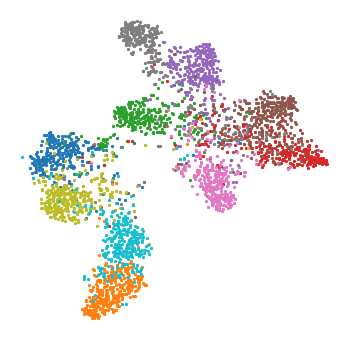

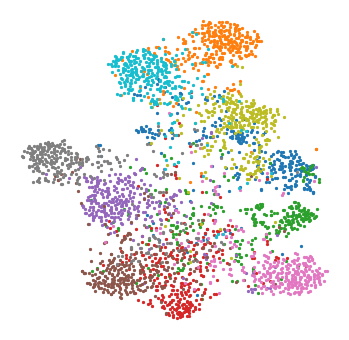

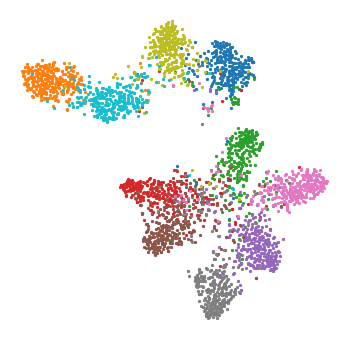

In [8]:
# lr=250
# per=60
# ns=300
lr=300
per=60
ns=300
visualize_feats(feats_path='./data/cifar10_r50_feats_base.npy', labels_path='./data/cifar10_r50_labels_base.npy', num_samples=ns,
               per=per, lr=lr,name='base_only')
visualize_feats(feats_path='./data/cifar10_r50_feats_aux.npy', labels_path='./data/cifar10_r50_labels_aux.npy', num_samples=ns,
               per=per, lr=lr,name='aux_only')
visualize_feats(feats_path='./data/cifar10_r50_feats_aux_base.npy', labels_path='./data/cifar10_r50_labels_aux_base.npy', num_samples=ns,
               per=per, lr=lr,name='base_aux')